# Health Insurance Cross Sell

Link: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

## 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

## 0.1 Loading the dataset

In [2]:
df_raw = pd.read_csv('../data/raw/train.csv')

## 1.0 Data description

In [3]:
df1 = df_raw.copy()


### 1.1 Renaming columns

In [4]:
df1.columns = [col.lower() for col in df_raw.columns]

### 1.1 Data dimension

In [5]:
print('This dataset has {} rows and {} columns.'.format(*df1.shape))

This dataset has 381109 rows and 12 columns.


### 1.2 Data types

In [6]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### 1.3 Check NA

In [7]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

### 1.4 Data descriptive

* Numerical data

In [8]:
stats = df1.describe(include=['int64', 'float64'])

stats.loc['var'] = df1.var(numeric_only=True).tolist()
stats.loc['skew'] = df1.skew(numeric_only=True).tolist()
stats.loc['kurt'] = df1.kurtosis(numeric_only=True).tolist()

stats

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,3.811090e+05,381109.000000,381109.000000,381109.000000,381109.000000,3.811090e+05,381109.000000,381109.000000,381109.000000
mean,1.905550e+05,38.822584,0.997869,26.388807,0.458210,3.056439e+04,112.034295,154.347397,0.122563
std,1.100168e+05,15.511611,0.046110,13.229888,0.498251,1.721316e+04,54.203995,83.671304,0.327936
min,1.000000e+00,20.000000,0.000000,0.000000,0.000000,2.630000e+03,1.000000,10.000000,0.000000
25%,9.527800e+04,25.000000,1.000000,15.000000,0.000000,2.440500e+04,29.000000,82.000000,0.000000
50%,1.905550e+05,36.000000,1.000000,28.000000,0.000000,3.166900e+04,133.000000,154.000000,0.000000
75%,2.858320e+05,49.000000,1.000000,35.000000,1.000000,3.940000e+04,152.000000,227.000000,0.000000
max,3.811090e+05,85.000000,1.000000,52.000000,1.000000,5.401650e+05,163.000000,299.000000,1.000000
var,1.210370e+10,240.610076,0.002126,175.029937,0.248254,2.962927e+08,2938.073050,7000.887051,0.107542
skew,9.443274e-16,0.672539,-21.595182,-0.115266,0.167747,1.766087e+00,-0.900008,0.003030,2.301906


* Categorical data

In [9]:
df1.describe(exclude=['int64', 'float64'])

,gender,vehicle_age,vehicle_damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## 2.0 Feature Engineering

In [10]:
df2 = df1.copy()

 - Mapping categorical variables to numerical variables
    - gender:
        - Male: 1
        - Female: 0
        
    - vehicle damage:
        - Yes: 1
        - No: 0
        
    - vehicle age:
        - < Year: -1
        - 1-2 Year: 0
        - \> 2 Year: 1

In [11]:
df2['gender'] = df2['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: -1 if x == '< 1 Year' else 0 if x == '1-2 Year' else 1)

In [12]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,1,44,1,28.0,0,1,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,1,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,-1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,-1,0,27496.0,152.0,39,0


## 3.0 Data Filtering

In [13]:
df3 = df2.copy()

## 4.0 Exploratory Data Analysis

In [14]:
df4 = df3.copy()

### 4.1 Univariate Analysis

 - Class Distribution

In [15]:
df1['response'].value_counts()

0    334399
1     46710
Name: response, dtype: int64

 - Age

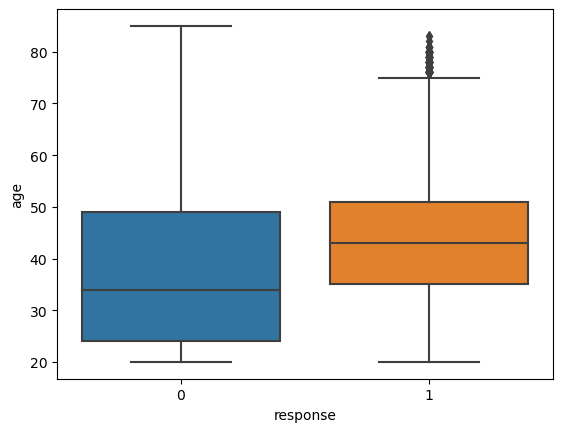

In [16]:
sns.boxplot(x='response', y='age', data=df4);
plt.show()

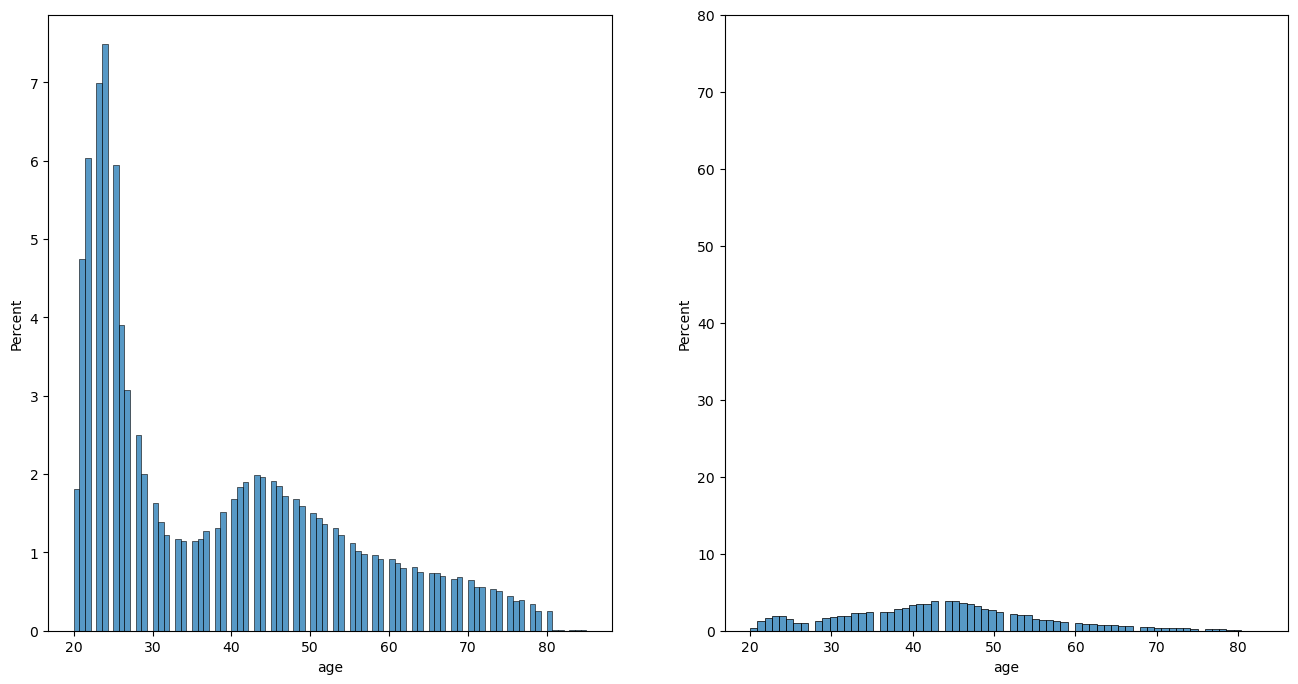

In [17]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df4.loc[df4['response'] == 0, 'age'], ax=ax[0], stat='percent');
sns.histplot(df4.loc[df4['response'] == 1, 'age'], ax=ax[1], stat='percent');

plt.ylim(0, 80)
#plt.xlim(0,10)

plt.show()

 - Gender

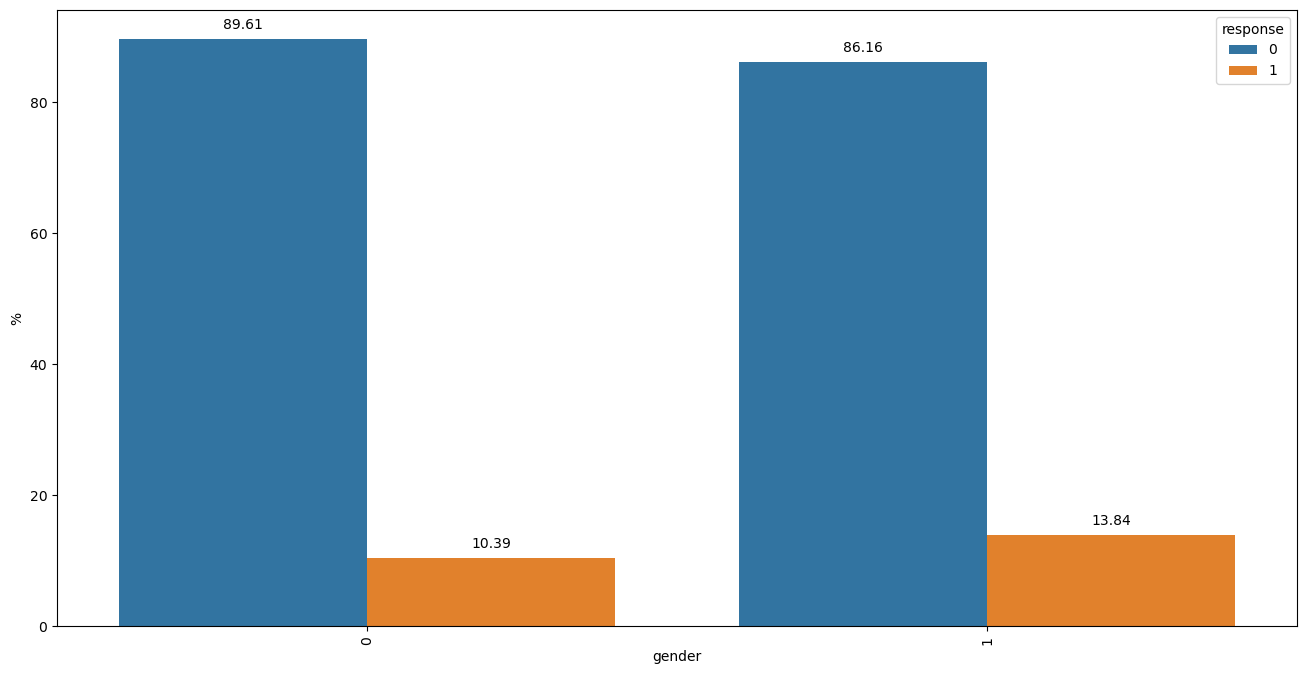

In [18]:
fig, ax = plt.subplots(figsize=(16,8))

col = 'gender'

data_aux = df4.groupby(col)['response'].value_counts(normalize=True).mul(100).rename('%').reset_index()
sns.barplot(x=col, y='%', hue='response', data=data_aux);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.xticks(rotation=90);

plt.show()

 - Annual Premium

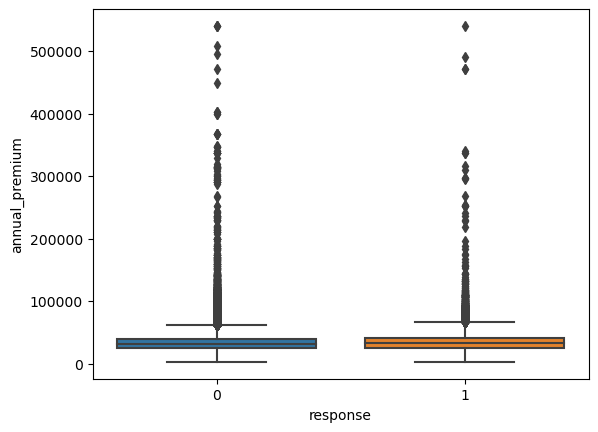

In [19]:
sns.boxplot(x='response', y='annual_premium', data=df4);
plt.show();

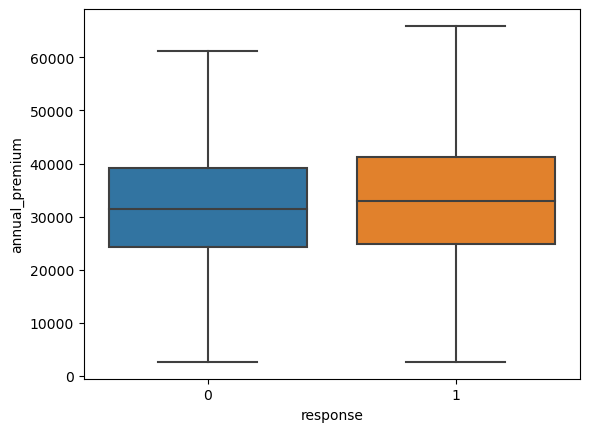

In [20]:
sns.boxplot(x='response', y='annual_premium', data=df4, showfliers=False);
plt.show();

 - Driving License

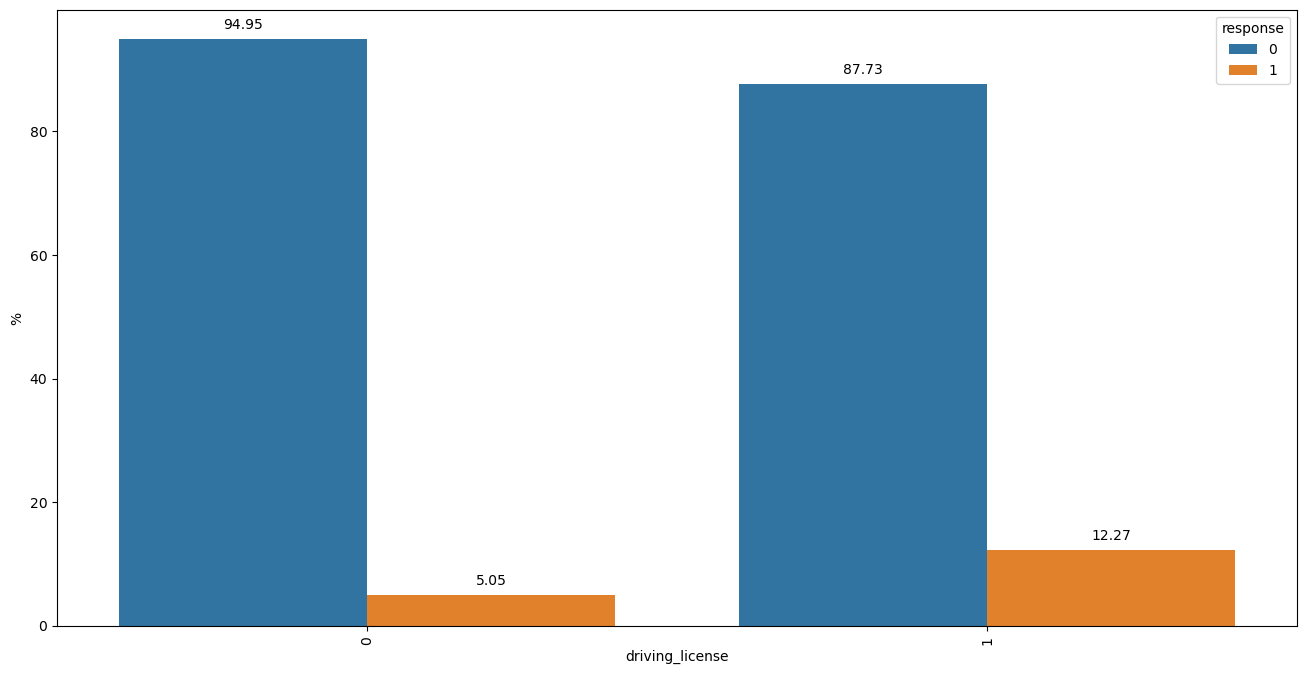

In [21]:
fig, ax = plt.subplots(figsize=(16,8))

col = 'driving_license'

data_aux = df4.groupby(col)['response'].value_counts(normalize=True).mul(100).rename('%').reset_index()
sns.barplot(x=col, y='%', hue='response', data=data_aux);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.xticks(rotation=90);

plt.show()

 - Region Code

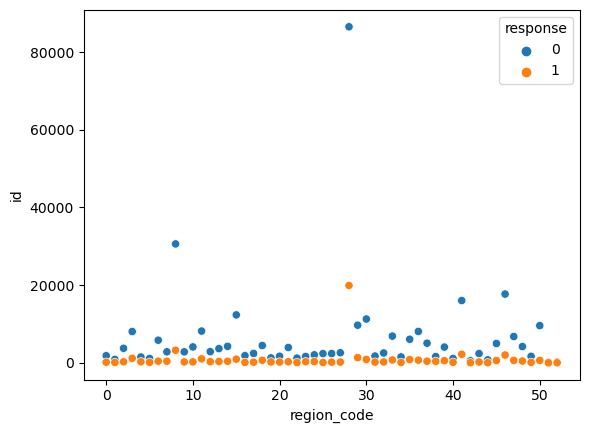

In [22]:
ax0 = df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=ax0)
plt.show()

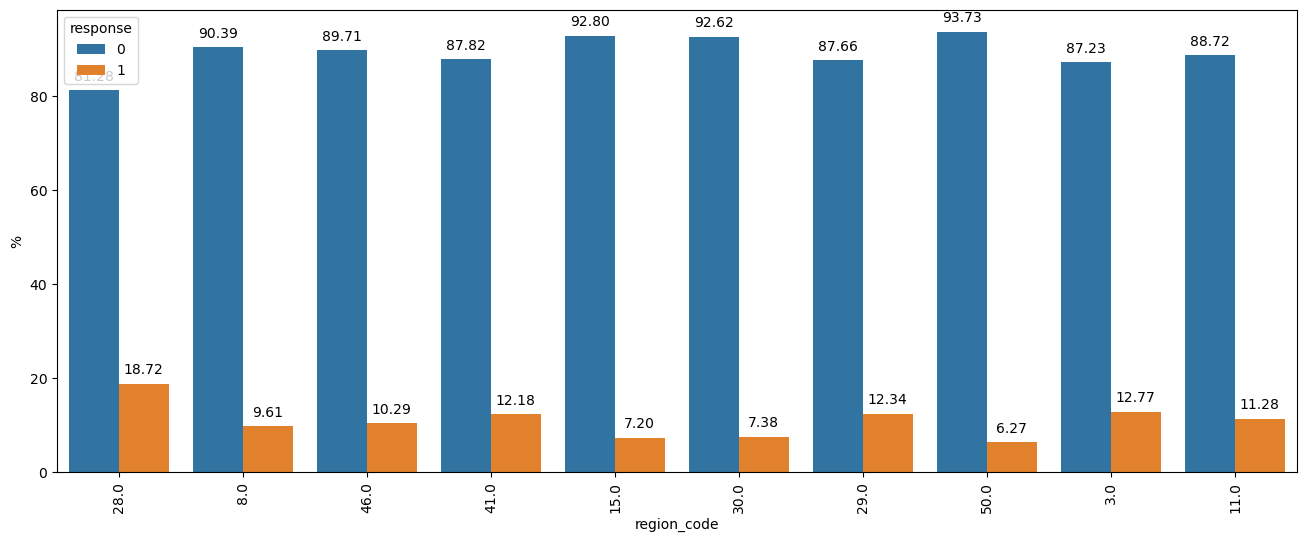

In [23]:
fig, ax = plt.subplots(figsize=(16,6))

col = 'region_code'
cols_order = df4[col].value_counts(normalize=False).sort_values(ascending=False).head(10).keys()
data_aux = df4.groupby(col)['response'].value_counts(normalize=True).mul(100).rename('%').reset_index()
sns.barplot(x=col, y='%', hue='response', data=data_aux, order=cols_order);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=90);
plt.show();

 - Previously Insured

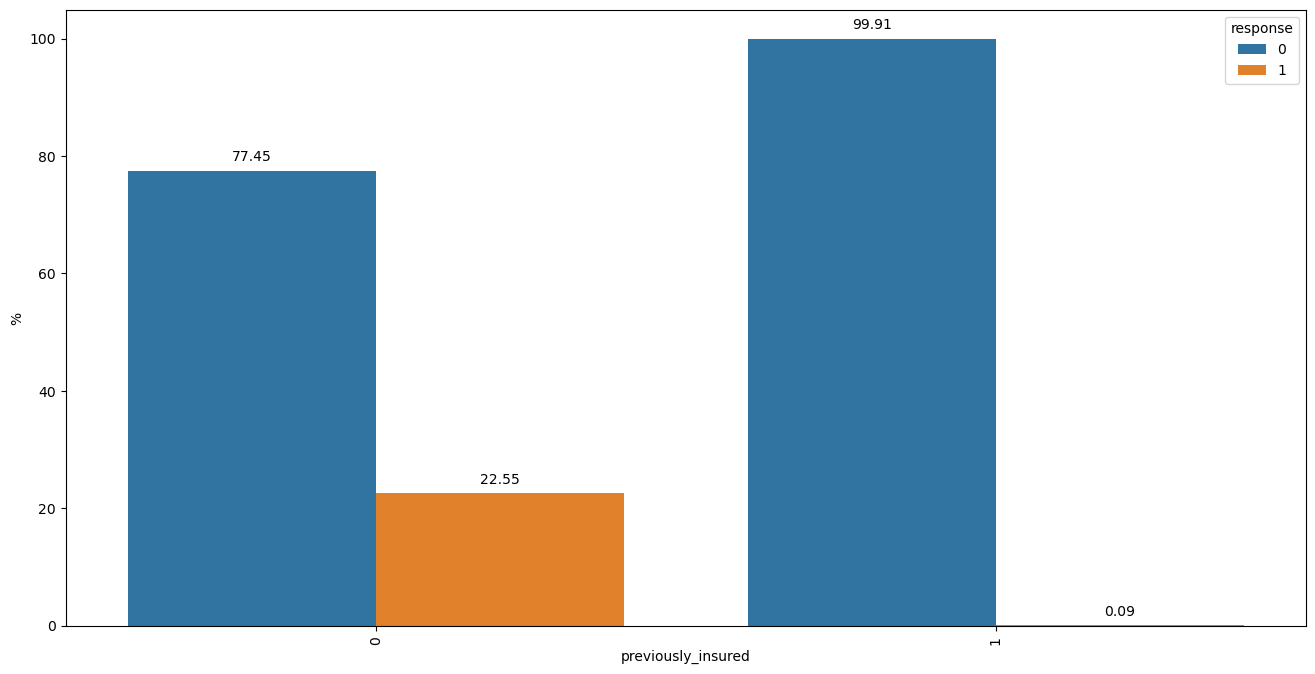

In [24]:
fig, ax = plt.subplots(figsize=(16,8))

col = 'previously_insured'

data_aux = df4.groupby(col)['response'].value_counts(normalize=True).mul(100).rename('%').reset_index()
sns.barplot(x=col, y='%', hue='response', data=data_aux);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.xticks(rotation=90);

plt.show()

 - vehicle_age

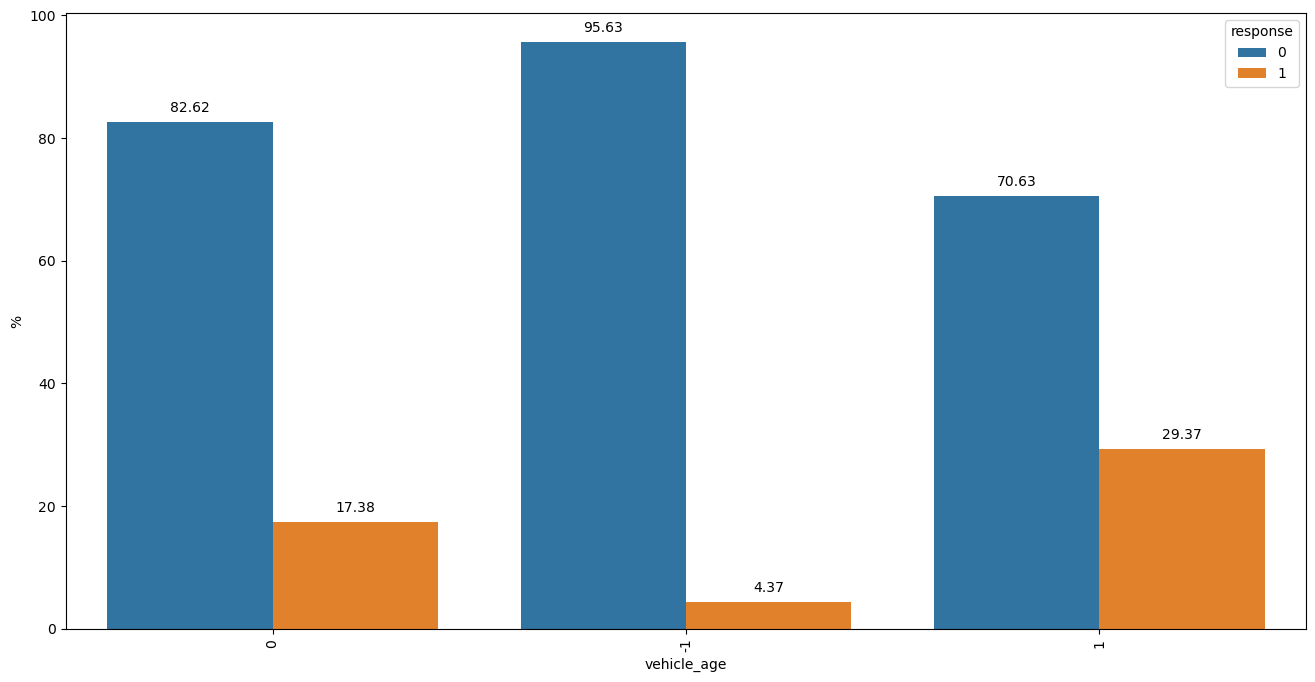

In [25]:
fig, ax = plt.subplots(figsize=(16,8))

col = 'vehicle_age'

cols_order = df4[col].value_counts(normalize=False).sort_values(ascending=False).keys()

data_aux = df4.groupby(col)['response'].value_counts(normalize=True).mul(100).rename('%').reset_index()
sns.barplot(x=col, y='%', hue='response', data=data_aux, order=cols_order);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.xticks(rotation=90);

plt.show()

 - policy_sales_channel

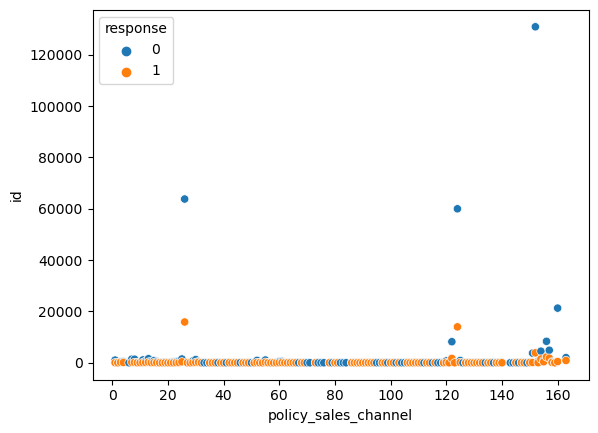

In [26]:
ax0 = df4[['id', 'policy_sales_channel', 'response']].groupby(['policy_sales_channel', 'response']).count().reset_index()
sns.scatterplot(x='policy_sales_channel', y='id', hue='response', data=ax0)
plt.show()

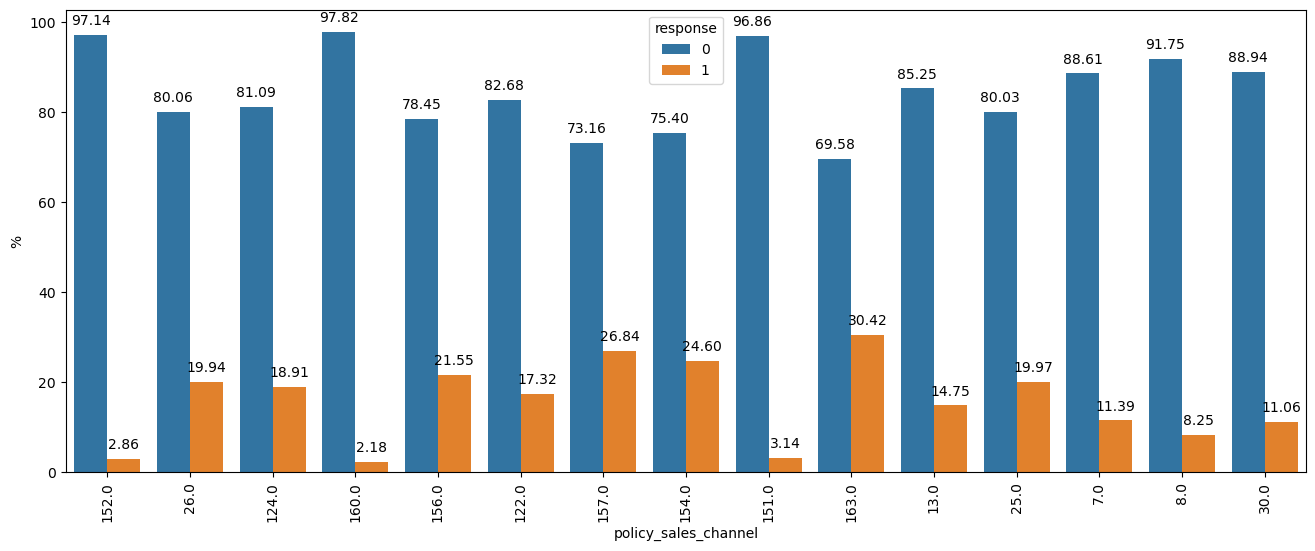

In [27]:
fig, ax = plt.subplots(figsize=(16,6))

col = 'policy_sales_channel'
cols_order = df4[col].value_counts(normalize=False).sort_values(ascending=False).head(15).keys()
data_aux = df4.groupby(col)['response'].value_counts(normalize=True).mul(100).rename('%').reset_index()
sns.barplot(x=col, y='%', hue='response', data=data_aux, order=cols_order);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=90);
plt.show();

 - vintage

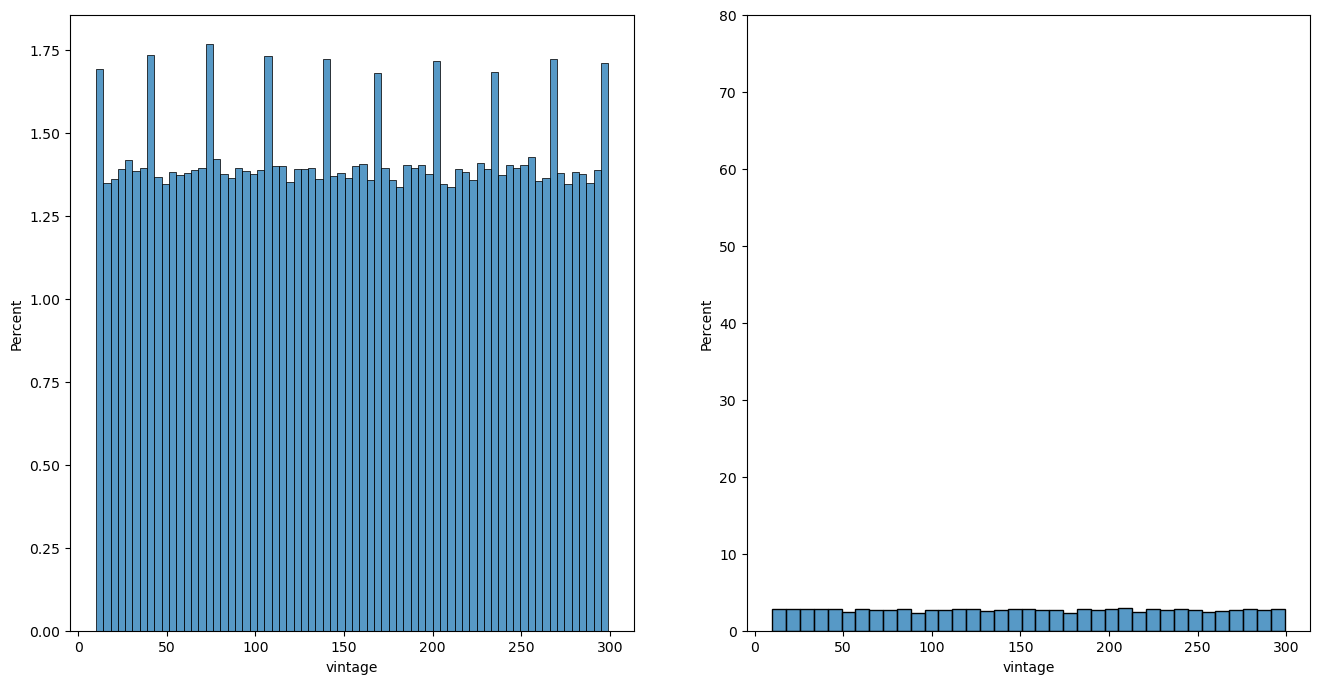

In [28]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.histplot(df4.loc[df4['response'] == 0, 'vintage'], ax=ax[0], stat='percent');
sns.histplot(df4.loc[df4['response'] == 1, 'vintage'], ax=ax[1], stat='percent');

plt.ylim(0, 80)
#plt.xlim(0,10)

plt.show()

## 5.0 Data Preparation

In [29]:
df5 = df4.copy()

In [30]:
X = df5.drop('response', axis=1).copy()
y = df5['response'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y.values)
df5 = pd.concat([X_train, y_train], axis=1)

### 5.1 Standardization

In [31]:
ss = StandardScaler()
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

### 5.2 Rescaling

In [32]:
mms_age = MinMaxScaler()
mms_vintage = MinMaxScaler()

df5['age'] = mms_age.fit_transform(df5[['age']].values)
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)

### 5.3 Encoding

In [33]:
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encode_region_code)
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size()/len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)

## 5.4 Preparation of Validation Data

In [34]:
X_train = df5.drop('response', axis=1).copy()
y_train = df5['response'].copy()

In [35]:
X_test = X_test.copy()

In [36]:
#X_test['gender'] = X_test['gender'].apply(lambda x: 1 if x == 'Male' else 0)
#X_test['vehicle_damage'] = X_test['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
#X_test['vehicle_age'] = X_test['vehicle_age'].apply(lambda x: -1 if x == '< 1 Year' else 0 if x == '1-2 Year' else 1)

X_test.loc[:, 'gender'] = X_test.loc[:, 'gender'].map(target_encode_region_code)
X_test.loc[:, 'region_code'] = X_test.loc[:, 'region_code'].map(target_encode_region_code)
X_test.loc[:, 'policy_sales_channel'] = X_test.loc[:, 'policy_sales_channel'].map(fe_policy_sales_channel)
X_test.loc[:, 'annual_premium'] = ss.transform(X_test[['annual_premium']].values)
X_test.loc[:, 'vintage'] = mms_vintage.transform(X_test[['vintage']].values)
X_test.loc[:, 'age'] = mms_age.transform(X_test[['age']].values)
X_test = pd.get_dummies(X_test, prefix='vehicle_age', columns=['vehicle_age'])

X_test = X_test.fillna(0)

## 6.0 Feature Selection

### 6.1 Model Based

In [37]:
forest = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

x_train_n = df5.drop(['id', 'response'], axis=1)
y_train_n = y_train.values

forest.fit(x_train_n, y_train_n)

RandomForestClassifier(n_jobs=-1, random_state=42)

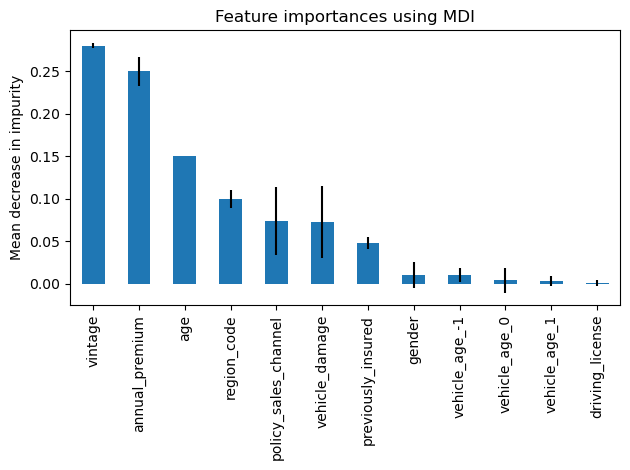

In [38]:
importances = forest.feature_importances_
feature_names = x_train_n.columns

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()
plt.show()

## 7.0 Machine Learning Models

### 7.1 $k$-NN

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.drop(['id'], axis=1), y_train)
yhat_knn = knn_model.predict_proba(X_test.drop(['id'], axis=1))

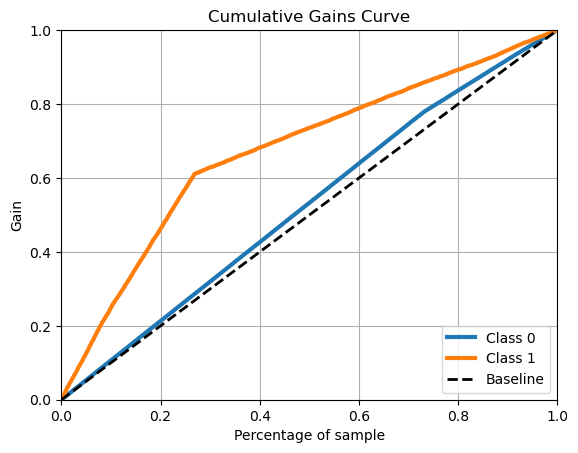

In [58]:
skplt.metrics.plot_cumulative_gain(y_test, yhat_knn);
plt.show()

### 7.2 ExtraTreesClassifier

In [45]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_train.drop(['id'], axis=1), y_train)
yhat_extra_trees_model = extra_trees_model.predict_proba(X_test.drop(['id'], axis=1))

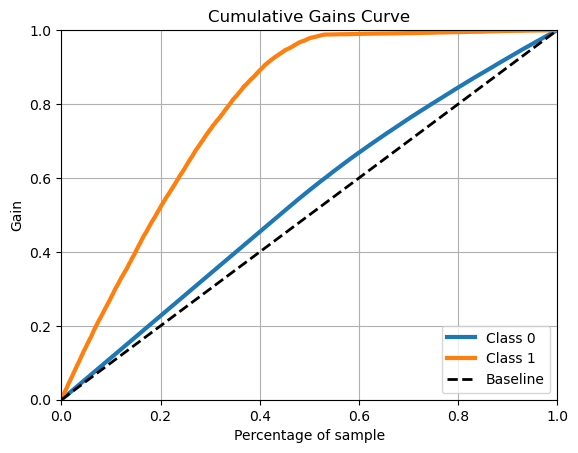

In [46]:
skplt.metrics.plot_cumulative_gain(y_test, yhat_extra_trees_model);
plt.show()

## 8.0 Model Performance

In [59]:
df8 = X_test.copy()
df8['response'] = y_test.copy()

df8['score'] = yhat_knn[:, 1].tolist()

df8 = df8.sort_values('score', ascending=False)

In [60]:
def precision_at_k(data, target, k=2000):
    data = data.reset_index(drop=True)
    data['ranking'] = data.index + 1
    data['precision_at_k'] = data[target].cumsum()/data['ranking']
    return data.loc[k, 'precision_at_k']

In [62]:
def recall_at_k(data, target, k=2000):
    data = data.reset_index(drop=True)
    data['ranking'] = data.index + 1
    data['precision_at_k'] = data[target].cumsum()/data['ranking'].sum()
    return data.loc[k, 'precision_at_k']

In [63]:
precision_at_50 = precision_at_k(df8, 'response', 50)
recall_at_50 = recall_at_k(df8, 'response', 50)

print('Precision@K: {}'.format(precision_at_50))
print('Recall@K: {}'.format(recall_at_50))

Precision@K: 0.2549019607843137
Recall@K: 1.6437788873252392e-09


In [64]:
df8 = X_test.copy()
df8['response'] = y_test.copy()

df8['score'] = yhat_extra_trees_model[:, 1].tolist()

df8 = df8.sort_values('score', ascending=False)

In [65]:
precision_at_50 = precision_at_k(df8, 'response', 50)
recall_at_50 = recall_at_k(df8, 'response', 50)

print('Precision@K: {}'.format(precision_at_50))
print('Recall@K: {}'.format(recall_at_50))

Precision@K: 0.39215686274509803
Recall@K: 2.5288905958849834e-09


In [66]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.drop(['id'], axis=1), y_train)
yhat_knn = knn_model.predict_proba(X_test.drop(['id'], axis=1))